## Time Series Analysis

[tutorial link](https://www.youtube.com/watch?v=e8Yw4alG16Q&list=PL9ooVrP1hQOHUfd-g8GUpKI3hHOwM_9Dn&index=18)

### Why TSA is needed

In SL, we have dep var and ind var and we try to deduce a mapping function bw the two with the help of our
data. In TSA, we just have one var, i.e. time and we need to predict another var on the basis of time (say sales). 

For eg, u own a coffee shop and u have record of ur sales over each month. We have only one var, sales and we need to predict it in accordance with time

A **Time Series** is a set of obs taken at specified times, usually at equal intervals. It is used to predict the future values based on prev obs values

### Components of TS

1. Trend

    - Trend is a movement to relatively higher or lower values over a long period of time. General pattern - may be upward or downward or horizontal/stationary. For eg: there is an inc in sales over 1 yr. Then as demand dec, sales dec in next 6 months. This is a trend. This is not a pattern which is happening year on year. Trend is something that happens for some time, but then disappears

2. Seasonality

    - Repeating pattern within a fixed time period. For eg Christmas - chocolates - sales inc last week of Dec - repeating pattern. Ice cream - inc in summer every yr - repeating pattern
    
3. Irregularity/Noise
    
    - Eratic in nature. Happens for short duration, non repeating. Say flood - medicines inc - but then settles down. This is something no one could have predicted

4. Cyclic
    
    - Repeating up and down movements, dont have fixed pattern, may happen for over 4yrs, 2 yrs, 6 months etc. Much harder to predict
    
### When not to use TSA

- Values are const
- Values in form of specific functions



### What is Stationarity

If TS has a particular behaviour over time, there is a v high prob that it will follow the same in the future

Any kind of models we apply on TS it will assume the data to be stationary

Stationary means:

- Const mean, mean should be const acc to time

- Const variance, variance should be equal at diff time intervals

- Autocovariance that does not depend on time. Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Say current time period = t. Say there are 2 time periods: t-1 and t-2. Values at t-2,t-1,t should not have any corr bw them

When these 3 cond are met -> series is **stationary** -> we can apply TSA

### Tests to check Stationarity

1. Rolling statistics

    - Plot moving avg or moving variance and see if it varies with time. ie any instance t will take an avg or var of a given time window
    - More of a visual technique
    
2. ADCF Test
    
    - Null hypo: TS is non stationary
    - We will get test stat and critical values. If test stat < critical value - Reject null hypo - stationary
    
    

### ARIMA

- One of the best models to work with TS

- Combination of 2 models - AR(Auto Regressive) + I(Integration) + MA(Moving Average)

- AR: corr of prev time period to the current

- MA: to soothen out the noise

- 3 params
    - P: autoregressive lags
    - Q: moving avg
    - d: order or differentiation - we use some kind of diff to make data stationary
    
<img src="./img/diag1.png">

### Demo

Build a model to forecast the demand (passenger traffic) in Airplanes

[dataset link](https://raw.githubusercontent.com/ShaunakSen/Data-Science-and-Machine-Learning/master/TIme%20Series%20Analysis/AirPassengers.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8

from datetime import datetime

In [2]:
dataset = pd.read_csv('./AirPassengers.csv')

dataset.head()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [3]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)

dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [6]:
len(dataset['Month'].unique()) == len(dataset) # all unique so can set Month as index

True

In [7]:
indexedDataset = dataset.set_index(['Month'])

indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
# view max date
max(list(indexedDataset.index))

Timestamp('1960-12-01 00:00:00')

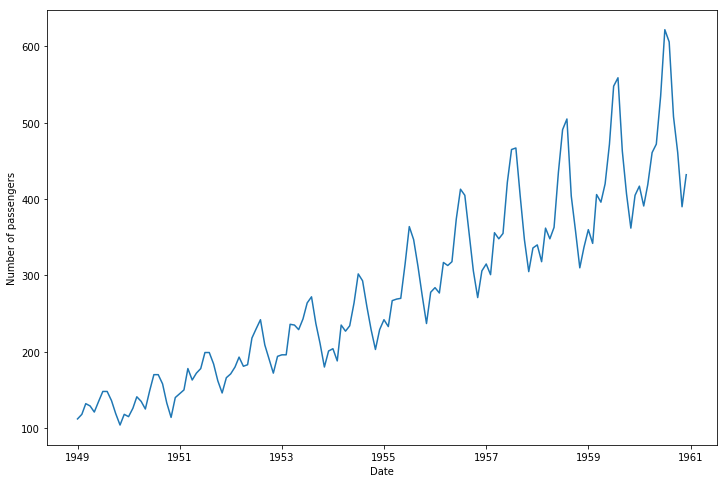

In [9]:
# plot graph

plt.xlabel("Date")
plt.ylabel("Number of passengers")

plt.plot(indexedDataset);

Here we clearly observe an upward trend. Next step is to check the stationarity

Here we can see that the mean follows an upward trend. So our data is non-stationary

#### Determining stationarity through tests:

In [10]:
# rolling statistics

# rolling mean

roll_mean = indexedDataset.rolling(window=12).mean() #12: 12 months

roll_std = indexedDataset.rolling(window=12).std()

print (roll_mean)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

First 11 rows are NaN as our window size is 12

Plot the rolling statistics:


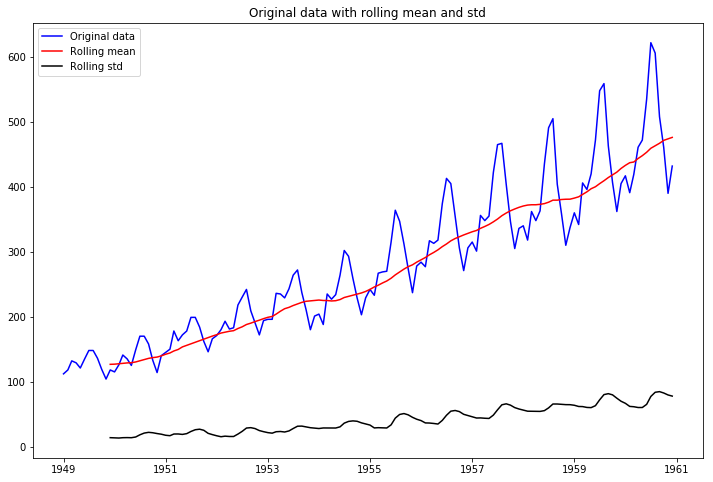

In [11]:
original_plot = plt.plot(indexedDataset, color='blue', label='Original data')
mean_plot = plt.plot(roll_mean, color='red', label='Rolling mean')
std_plot = plt.plot(roll_std, color='black', label='Rolling std')

plt.legend(loc='best')
plt.title("Original data with rolling mean and std")

plt.show(block=False);

Mean and std is not const

So data is **not stationary**

Dickey-Fuller test:

In [12]:
from statsmodels.tsa.stattools import adfuller

print ("Results of Dickey-Fuller Test:")

dftest = adfuller(x=indexedDataset['#Passengers'], autolag='AIC') # AIC: Akaike Info Criteria

print (dftest)

    
dfoutput = pd.Series(data=dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])

# critical values

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
dfoutput

Results of Dickey-Fuller Test:
(0.8153688792060398, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

p-value is 0.99. It should be less around 0.05. Also critical values should be more than the test statistic value. So we cannot say data is stationary

To make data stationary we can make certain transformations and estimate trend from that

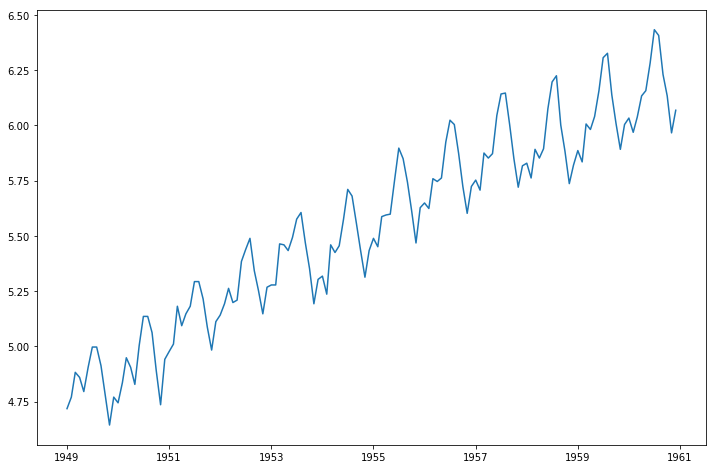

In [13]:
# log transformation

indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale);

Note how the numbers on Y axis have dec as we have taken the log. Note that the trend remains the same. Now we calculate the moving avg

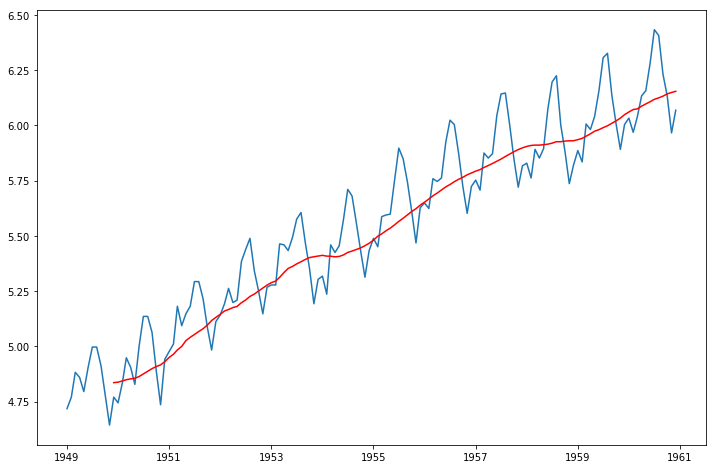

In [14]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingStd = indexedDataset_logScale.rolling(window=12).std()

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red');

Data is not stationary, as mean inc with time 

Next transformation we try is the diff bw the number of passengers (in log scale) and the moving avg



In [18]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage

datasetLogScaleMinusMovingAverage.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [19]:
# Remove NaN values

datasetLogScaleMinusMovingAverage.dropna(inplace=True)

datasetLogScaleMinusMovingAverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


Consolidating the visuual and statistical techniques of detecting stationarity into a single function

In [20]:
def test_stationarity(timeseries):
    
    # Determine rolling stats
    
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    # Plot rolling stats
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean_plot = plt.plot(movingAverage, color='red', label='Rolling mean')
    std_plot = plt.plot(movingStd, color='black', label='Rolling std')

    plt.legend(loc='best')
    plt.title("Original data with rolling mean and std")

    plt.show(block=False);
    
    # perform ADF test
    print ("Results of Dickey-Fuller Test:")
    
    dftest = adfuller(x=timeseries['#Passengers'], autolag='AIC') # AIC: Akaike Info Criteria

    dfoutput = pd.Series(data=dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])

    # critical values

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)

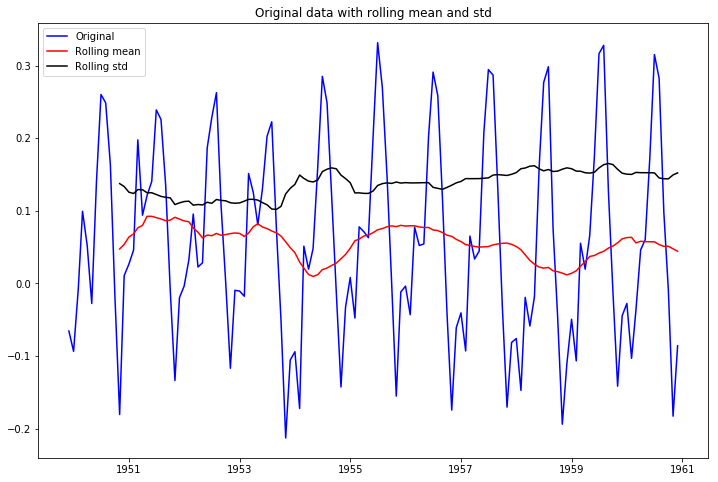

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [21]:
test_stationarity(datasetLogScaleMinusMovingAverage)

- Rolling mean and rolling std has no such trend, and the results are much better than earlier
- ADCF Results: p value is less - 0.02 < 0.05. Critical values and test stat values are almost equal

Next we calculate Wt avg of time series to see the trend

In [25]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()

exponentialDecayWeightedAverage.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.745345
1949-03-01,4.793835
1949-04-01,4.811785
1949-05-01,4.808206


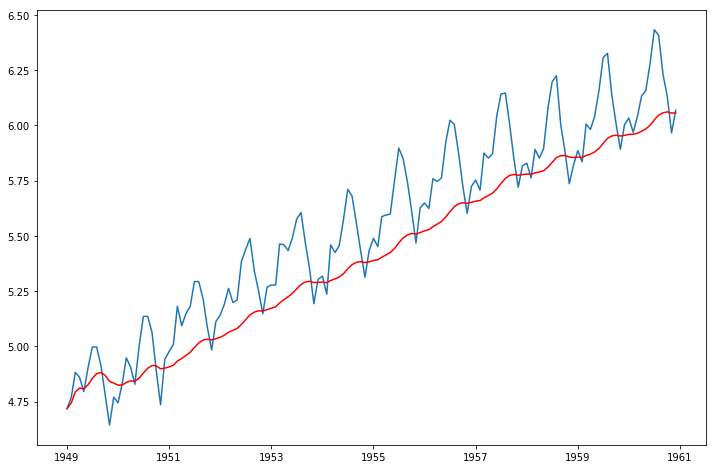

In [27]:
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red');

Another transformation: log scale - wt avg

In prev scenario we had done log scale - simple moving avg mean

In [28]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
datasetLogScaleMinusMovingExponentialDecayAverage.head()

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.025339
1949-03-01,0.088967
1949-04-01,0.048028
1949-05-01,-0.012415


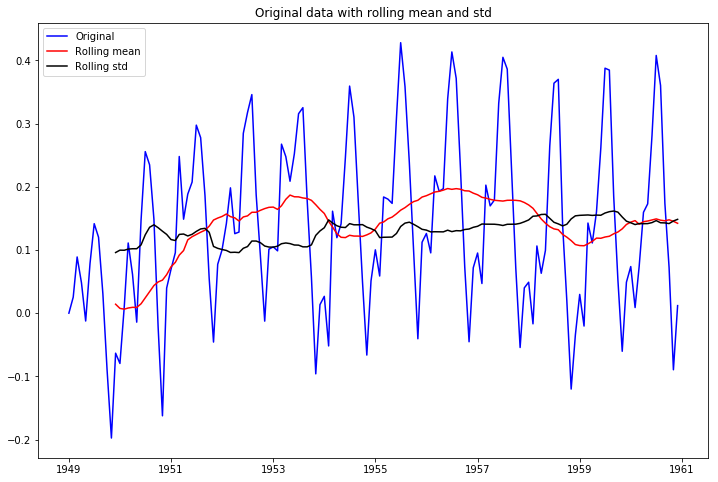

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [29]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

- std is quite flat, no trend
- rolling mean is also better
- p value is even lesser

**Time series is stationary**

We can use both this and the earlier transformation to determine stationarity